In [24]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [2]:
os.getcwd()  ####to get current working directory 

'C:\\Users\\well\\Downloads'

In [3]:
#os.chdir('')##to change working directory. in quotes write path .right click 

In [5]:
USAHousing=pd.read_csv('USA_Housing.csv')

In [6]:
USAHousing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


In [7]:
##address is not required as it is different for each data
USAHousing.iloc[:,0:6]

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05
...,...,...,...,...,...,...
4995,60567.94414,7.830362,6.137356,3.46,22837.36103,1.060194e+06
4996,78491.27543,6.999135,6.576763,4.02,25616.11549,1.482618e+06
4997,63390.68689,7.250591,4.805081,2.13,33266.14549,1.030730e+06
4998,68001.33124,5.534388,7.130144,5.44,42625.62016,1.198657e+06


In [8]:
USAHousing.isnull().sum()

Avg. Area Income                10
Avg. Area House Age              0
Avg. Area Number of Rooms        5
Avg. Area Number of Bedrooms     6
Area Population                  0
Price                            0
Address                          0
dtype: int64

<AxesSubplot:ylabel='Avg. Area Income'>

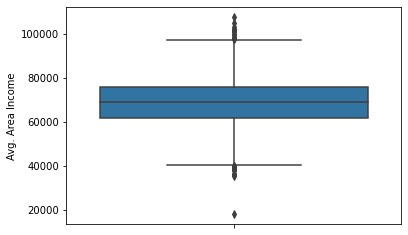

In [9]:
##if more than 25% data is missing in a column we remove that variable. 3 columns have missing data. First check if missing data is numerical or categorical
#tocheck outlier
sns.boxplot(y='Avg. Area Income',data=USAHousing)

<AxesSubplot:ylabel='Avg. Area Number of Rooms'>

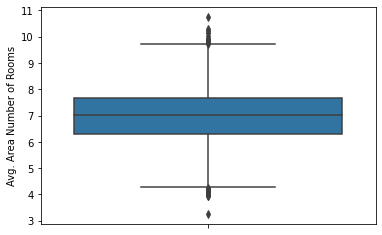

In [10]:
sns.boxplot(y='Avg. Area Number of Rooms',data=USAHousing)

In [ ]:
##Avg. Area Number of Rooms outlier not found since range is between 3 and 11

<AxesSubplot:ylabel='Avg. Area Number of Bedrooms'>

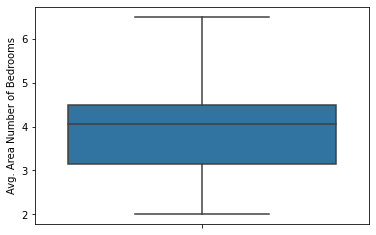

In [11]:
sns.boxplot(y='Avg. Area Number of Bedrooms',data=USAHousing)###Avg. Area Number of Bedrooms no outlier found

In [12]:
##3 fill missing values
USAHousing['Avg. Area Income']=USAHousing['Avg. Area Income'].fillna(USAHousing['Avg. Area Income'].median())

In [13]:
USAHousing['Avg. Area Number of Rooms']=USAHousing['Avg. Area Number of Rooms'].fillna(USAHousing['Avg. Area Number of Rooms'].median())

In [14]:
USAHousing['Avg. Area Number of Bedrooms']=USAHousing['Avg. Area Number of Bedrooms'].fillna(USAHousing['Avg. Area Number of Bedrooms'].mean())

In [15]:
USAHousing.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [ ]:
##missing values are no more there
###encoding is not required as all values are float and address variable was removed

In [16]:
USAHousing.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68585.145895,5.977222,6.987708,3.981874,36163.516039,1.232073e+06
std,10640.538021,0.991456,1.005435,1.233756,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61485.150192,5.322283,6.299692,3.140000,29403.928700,9.975771e+05
50%,68797.671885,5.970429,7.002940,4.050000,36199.406690,1.232669e+06
75%,75766.519103,6.650808,7.665281,4.490000,42861.290770,1.471210e+06
max,107701.748400,9.519088,10.759588,6.500000,69621.713380,2.469066e+06


In [17]:
USAHousing.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

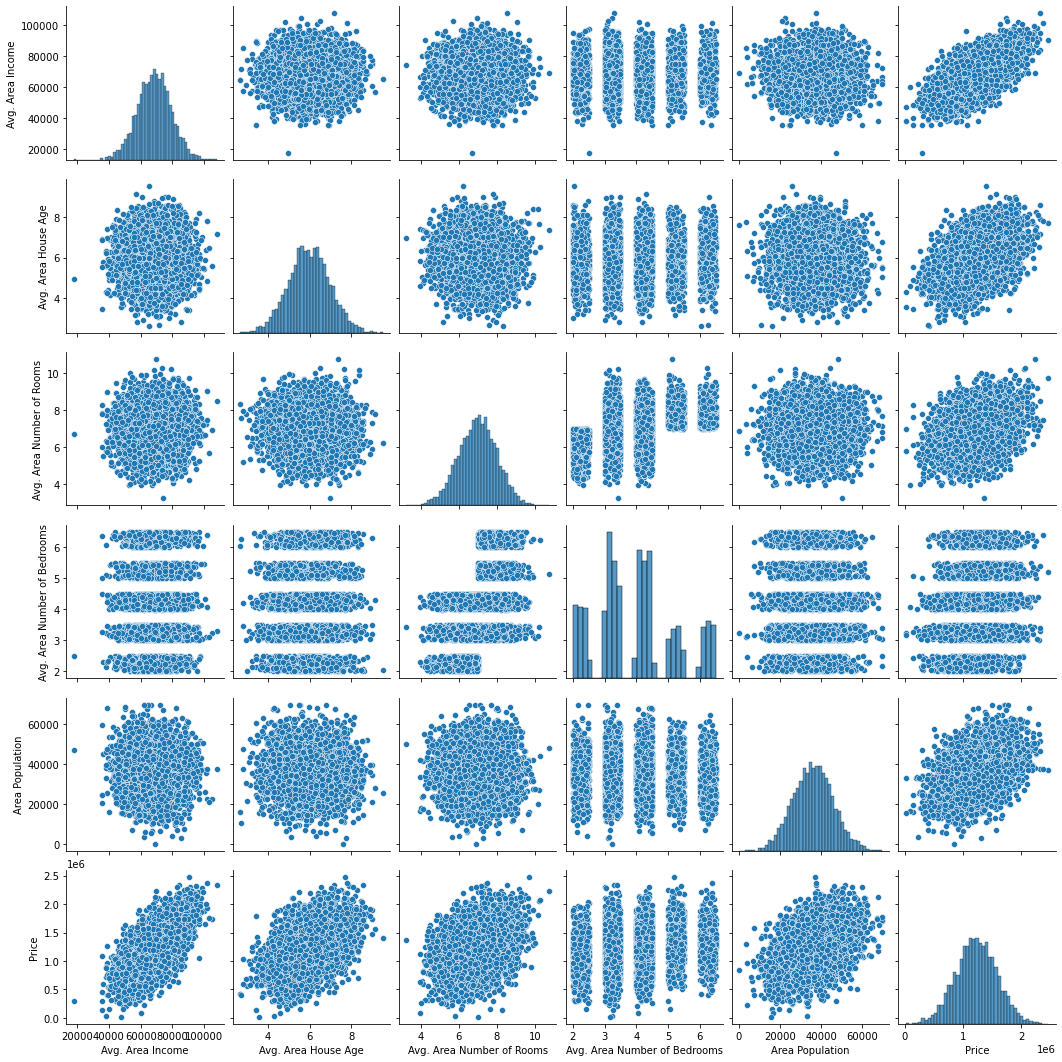

In [18]:
sns.pairplot(USAHousing)

In [ ]:
##positive correlation between price and income,price and house age,price and no. of rooms.  price and avg area no. of bedrooms have no correlation


In [ ]:
sns.distplot(USAHousing)

<AxesSubplot:>

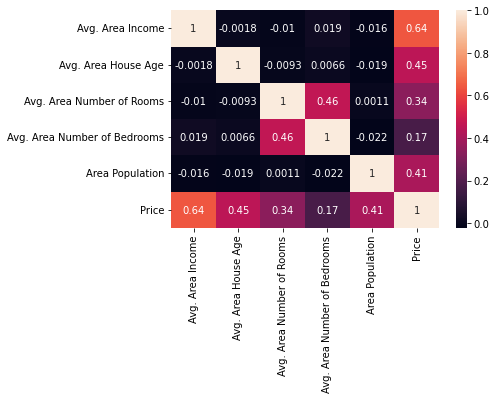

In [19]:
sns.heatmap(USAHousing.corr(),annot=True)

In [20]:
#splitting the data into independent and dependent variable
X=USAHousing.iloc[:,0:5]
Y=USAHousing['Price']

In [21]:
X.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.45857,5.682861,7.009188,4.09,23086.80050
1,79248.64245,6.002900,6.730821,3.09,40173.07217
2,61287.06718,5.865890,8.512727,5.13,36882.15940
3,63345.24005,7.188236,5.586729,3.26,34310.24283
4,59982.19723,5.040555,7.839388,4.23,26354.10947


In [22]:
Y.head()

0    1.059034e+06
1    1.505891e+06
2    1.058988e+06
3    1.260617e+06
4    6.309435e+05
Name: Price, dtype: float64

In [25]:
## train test split
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,train_size=0.75,random_state=42)

In [27]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(3750, 5)
(3750,)
(1250, 5)
(1250,)


In [28]:
## building linear regression model
from sklearn.linear_model import LinearRegression

In [30]:
lm=LinearRegression()
lm.fit(X_train,Y_train)

LinearRegression()

In [31]:
lm.intercept_   ###to find intercept value

-2633401.097903751

In [33]:
lm.coef_    ###to find coefficients of independent variable

array([2.16467666e+01, 1.65351676e+05, 1.19127986e+05, 2.27139219e+03,
       1.52243039e+01])

In [35]:
coeff_df=pd.DataFrame(lm.coef_,X.columns,columns=['Columns'])
coeff_df

,Columns
Avg. Area Income,21.646767
Avg. Area House Age,165351.676075
Avg. Area Number of Rooms,119127.985580
Avg. Area Number of Bedrooms,2271.392194
Area Population,15.224304


In [36]:
###predicting
predictions=lm.predict(X_test)
predictions

array([1308971.30752626, 1237159.27004491, 1244352.40045085, ...,
       1261805.16211084, 1076446.42857755, 1258890.83375004])

In [50]:
prediction1=lm.predict(X_train)

In [37]:
## find the loss function
# MAE  , 
from sklearn import metrics

In [40]:
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_test,predictions)))
print('MSE:', metrics.mean_squared_error(Y_test,predictions))
print('MAE:',metrics.mean_absolute_error(Y_test,predictions))

RMSE: 101102.5074235321
MSE: 10221717007.325363
MAE: 81392.43896866303


In [43]:
## not getting clarity so using
## lr-ols method
from statsmodels.regression.linear_model import OLS
import statsmodels.regression.linear_model as sf

In [44]:
reg_model= sf.OLS(endog = Y_train,exog = X_train).fit()
###endog means dependent variable and exo means independent variable
reg_model

In [45]:
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.964
Model:                            OLS   Adj. R-squared (uncentered):              0.964
Method:                 Least Squares   F-statistic:                          2.001e+04
Date:                Tue, 22 Mar 2022   Prob (F-statistic):                        0.00
Time:                        21:14:05   Log-Likelihood:                         -51826.
No. Observations:                3750   AIC:                                  1.037e+05
Df Residuals:                    3745   BIC:                                  1.037e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Avg. Area Income                10.4335      0.310     33.627      0.000       9.825      11.042
Avg. Area House Age           5.048e+04   3443.935     14.657      0.000    4.37e+04    5.72e+04
Avg. Area Number of Rooms    -1.147e+04   3754.511     -3.056      0.002   -1.88e+04   -4111.323
Avg. Area Number of Bedrooms  4675.7867   3663.859      1.276      0.202   -2507.567    1.19e+04
Area Population                  8.1024      0.377     21.491      0.000       7.363       8.842
==============================================================================
Omnibus:                        2.101   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.350   Jarque-Bera (JB):                2.109
Skew:                          -0.037   Prob(JB):                        0.348
Kurtosis:                       2.911   Cond. No.                     9.28e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 9.28e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

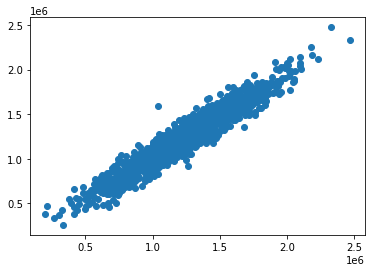

In [46]:
plt.scatter(Y_test,predictions)

C:\Users\well\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

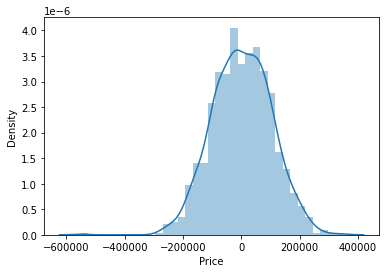

In [47]:
sns.distplot(Y_test-predictions)  ###if difference is normally distributed then there is no hetroscadisticity

In [48]:
from sklearn.metrics import r2_score

In [49]:
r2_score(Y_test,predictions)

0.9146228198561185

In [51]:
##to check if model is overfitting
r2_score(Y_train,prediction1)

0.917393303466164

In [ ]:
##3we can see model is not under or over fitting